In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Veri setini yükleme ve hazırlama
df = pd.read_excel("rainfall-and-daily-consumption-data-on-istanbul-dams.xlsx")
df = df[['Tarih', 'İstanbul günlük tüketim(m³/gün)']]
df = df.set_index("Tarih")
df.index = pd.to_datetime(df.index)
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'] // 100
df['İstanbul günlük tüketim(m³/gün)'] = df['İstanbul günlük tüketim(m³/gün)'].astype(float)
df = np.log(df)

# Veriyi normalize etme
scaler = MinMaxScaler()
df['İstanbul günlük tüketim(m³/gün)'] = scaler.fit_transform(df[['İstanbul günlük tüketim(m³/gün)']])

# Eğitim ve test setlerini oluşturma
train_size = int(len(df) * 0.80)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Exponential Smoothing modelini oluşturma
trend = 'add'  # Eğilim bileşeni (additive)
seasonal = 'add'  # Mevsimsel bileşen (additive)
es_model = ExponentialSmoothing(train['İstanbul günlük tüketim(m³/gün)'], trend=trend, seasonal=seasonal, seasonal_periods=7)
es_model_fit = es_model.fit()
print(es_model_fit.summary())

# Test seti üzerinde tahmin yapma
predictions = es_model_fit.predict(start=test.index[0], end=test.index[-1])

# Tahminleri orijinal ölçeğe döndürme
test_orig = scaler.inverse_transform(test[['İstanbul günlük tüketim(m³/gün)']])
predictions_orig = scaler.inverse_transform(predictions.values.reshape(-1, 1))

# Hataları hesaplama
mse = mean_squared_error(test_orig, predictions_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_orig, predictions_orig)
mape = mean_absolute_percentage_error(test_orig, predictions_orig) * 100

print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("Mean Absolute Percentage Error (MAPE): {:.4f}".format(mape))


C:\Users\DOGUKAN\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                             ExponentialSmoothing Model Results                            
Dep. Variable:     İstanbul günlük tüketim(m³/gün)   No. Observations:                 3771
Model:                        ExponentialSmoothing   SSE                              8.209
Optimized:                                    True   AIC                         -23093.539
Trend:                                    Additive   BIC                         -23024.953
Seasonal:                                 Additive   AICC                        -23093.442
Seasonal Periods:                                7   Date:                 Fri, 31 May 2024
Box-Cox:                                     False   Time:                         21:04:19
Box-Cox Coeff.:                               None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothin

In [51]:
predictions_orig

array([[10.21683559],
       [10.21446007],
       [10.22122278],
       [10.23687308],
       [10.22162049],
       [10.20794875],
       [10.21201167],
       [10.21733616],
       [10.21496064],
       [10.22172335],
       [10.23737365],
       [10.22212106],
       [10.20844933],
       [10.21251224],
       [10.21783673],
       [10.21546121],
       [10.22222393],
       [10.23787423],
       [10.22262163],
       [10.2089499 ],
       [10.21301282],
       [10.2183373 ],
       [10.21596179],
       [10.2227245 ],
       [10.2383748 ],
       [10.22312221],
       [10.20945047],
       [10.21351339],
       [10.21883788],
       [10.21646236],
       [10.22322507],
       [10.23887537],
       [10.22362278],
       [10.20995105],
       [10.21401396],
       [10.21933845],
       [10.21696293],
       [10.22372565],
       [10.23937595],
       [10.22412335],
       [10.21045162],
       [10.21451454],
       [10.21983902],
       [10.21746351],
       [10.22422622],
       [10

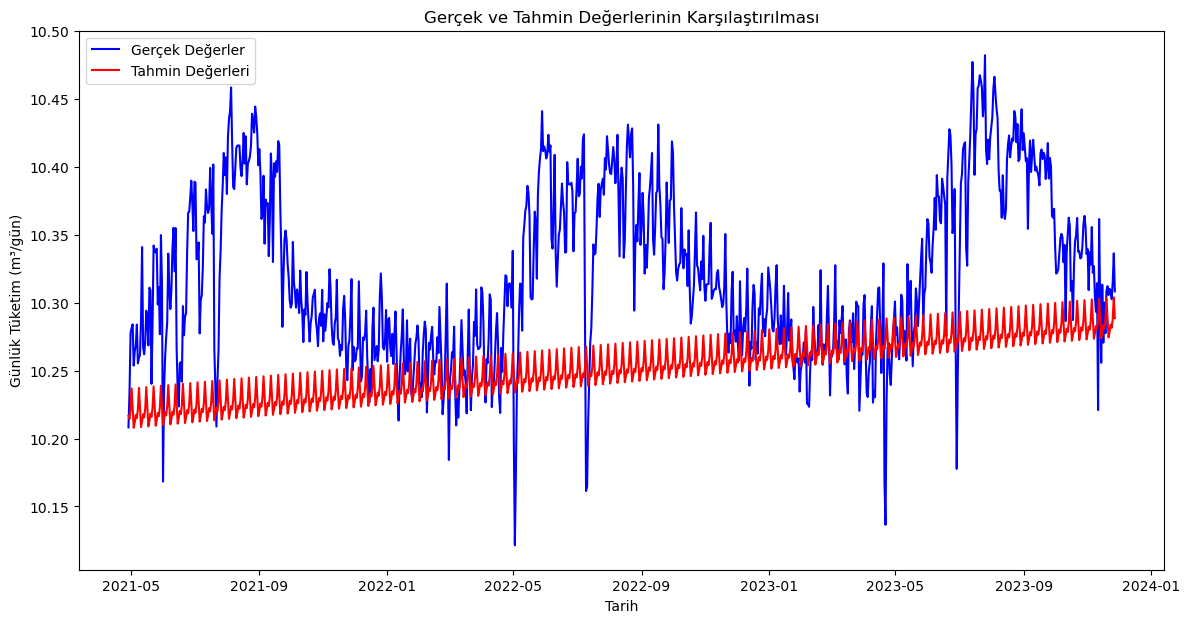

In [52]:
# Gerçek ve tahmin değerleri birleştirme
results = pd.DataFrame({'Tarih': test.index, 'Gerçek': test_orig.flatten(), 'Tahmin': predictions_orig.flatten()})
results = results.set_index('Tarih')

# Görselleştirme
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Gerçek'], label='Gerçek Değerler', color='blue')
plt.plot(results.index, results['Tahmin'], label='Tahmin Değerleri', color='red')
plt.title('Gerçek ve Tahmin Değerlerinin Karşılaştırılması')
plt.xlabel('Tarih')
plt.ylabel('Günlük Tüketim (m³/gün)')
plt.legend()
plt.show()
